# Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset 

In [71]:
ds=pd.read_csv(r'C:\Users\veera\Desktop\Assignment 2/Churn_Modelling.csv')

In [72]:
ds.shape

(10000, 14)

In [31]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualizations

## Univariate

C:\Users\veera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

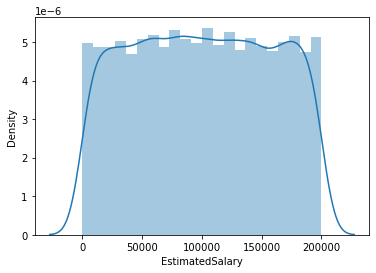

In [32]:
sns.distplot(ds['EstimatedSalary'],hist=True)

## Bivariate

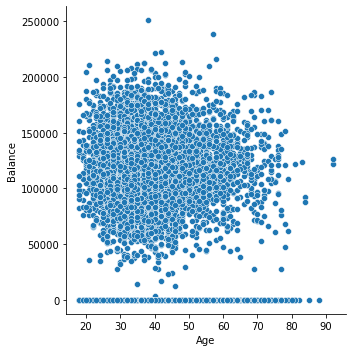

In [33]:
sns.relplot(x='Age',y='Balance',data=ds)

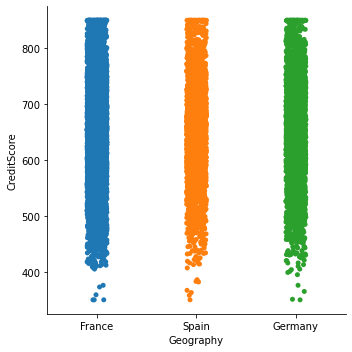

In [34]:
#categorical data
sns.catplot(x='Geography',y='CreditScore',data=ds)

## Multivariate

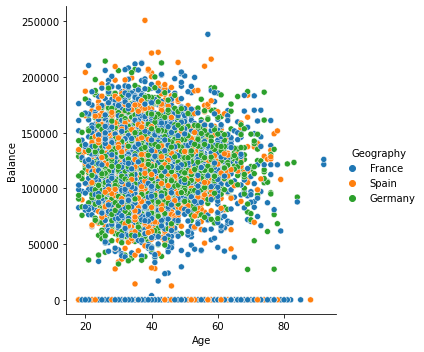

In [35]:
sns.relplot(x='Age',y='Balance',hue='Geography',data=ds)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

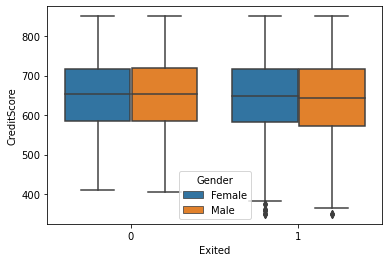

In [37]:
#categorical data
sns.boxplot(x='Exited',y='CreditScore',hue='Gender',data=ds)

# Descriptive Statistics

In [38]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handling the missing(null) values

In [39]:
ds.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [40]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
#no null values found , so no need to handle.

# Split the data into dependent and independent variables

In [42]:
x=ds.iloc[:,3:13].values
print(x.shape)
y=ds.iloc[:,13:14].values
print(y.shape)

(10000, 10)
(10000, 1)


# Finding and Replacing Outliers

In [43]:
ds.skew()

C:\Users\veera\AppData\Local\Temp\ipykernel_5256\4252094064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

C:\Users\veera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

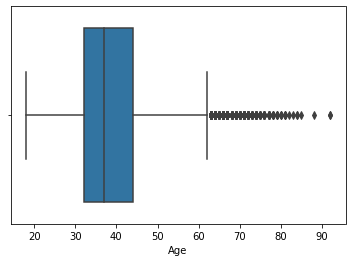

In [44]:
sns.boxplot(ds["Age"])

In [45]:
q0 = ds["Age"].describe()["25%"]

In [46]:
q1 = ds["Age"].describe()["75%"]

In [47]:
iqr=q1-q0

In [48]:
lb = q0 -(1.5*iqr)
ub = q1 + (1.5*iqr)

In [49]:
ds[ds["Age"]<lb]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [50]:
ds[ds["Age"]>ub]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [51]:
#Replacing the outlier
outlier_list = list(ds[ds["Age"] > ub]["Age"])

In [58]:
print(outlier_list)

[66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 67, 68, 73, 67, 64, 63, 92, 65, 75, 67, 71, 64, 66, 64, 66, 67, 77, 92, 67, 63, 66, 66, 68, 65, 72, 71, 76, 63,

In [59]:
outlier_dict = {}.fromkeys(outlier_list,ub)

In [60]:
print(outlier_dict)

{66: 62.0, 75: 62.0, 65: 62.0, 73: 62.0, 72: 62.0, 67: 62.0, 79: 62.0, 80: 62.0, 68: 62.0, 70: 62.0, 63: 62.0, 64: 62.0, 82: 62.0, 69: 62.0, 74: 62.0, 71: 62.0, 76: 62.0, 77: 62.0, 88: 62.0, 85: 62.0, 84: 62.0, 78: 62.0, 81: 62.0, 92: 62.0, 83: 62.0}


In [61]:
ds["Age"] = ds["Age"].replace(outlier_dict)

C:\Users\veera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

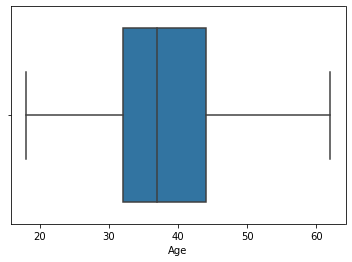

In [62]:
sns.boxplot(ds["Age"])

In [63]:
ds[ds["Age"]>ub]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Check for Categorical columns and perform encoding

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('oh',OneHotEncoder(),[1,2])],remainder='passthrough')
x=ct.fit_transform(x)
print(x.shape)

(10000, 13)


In [65]:
# saving the data
import joblib
joblib.dump(ct,"churnct.pkl")

['churnct.pkl']

# Split the data into training and testing

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(8000, 13)
(2000, 13)


In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [69]:
joblib.dump(sc,"churnsc.pkl")

['churnsc.pkl']